In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('C:/Users/dell/Downloads/vehicle price prediction/car_prices.csv')
df['year'].max()

np.int64(2015)

In [10]:
df.shape

(558837, 16)

In [11]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


make column ki ros es liye hatayi kyonki vhtse catagories thi thoda thoda sb me bata hua tha

In [13]:
df=df.dropna(subset=['make'])
df.isnull().sum()


year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [14]:
dmost_common_model = df.groupby('make')['model'].agg(lambda x: x.mode().loc[0])
dmost_common_model

make
Acura                       TL
Aston Martin        V8 Vantage
Audi                        A4
BMW                   3 Series
Bentley         Continental GT
                     ...      
subaru                forester
suzuki                   grand
toyota                  tundra
volkswagen              passat
vw                      routan
Name: model, Length: 96, dtype: object

In [15]:
def fill_model(row):
    if pd.isna(row['model']):
        return dmost_common_model[row['make']]
    return row['model']

In [16]:
df['model']=df.apply(fill_model,axis=1)
df.isnull().sum()

year                0
make                0
model               0
trim              350
body             2894
transmission    63591
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [17]:
df['model'].nunique()

973

In [18]:
df['model']=df['model'].str.lower()

In [19]:
df['model'].nunique()

851

In [20]:
df['body'] = df['body'].fillna(df.groupby('make')['body'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))
df.isnull().sum()

year                0
make                0
model               0
trim              350
body             2872
transmission    63591
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [21]:
df['body'].value_counts()

body
Sedan          199458
SUV            119292
sedan           41906
suv             24552
Hatchback       21381
                ...  
CTS-V Wagon         1
Ram Van             1
g37 coupe           1
cab plus 4          1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [22]:
df['body']=df['body'].apply(lambda x:x.lower() if pd.notna(x) else x)
df['body']=df['body'].apply(lambda x:x if pd.notna(x) else 'sedan' )

In [23]:
df['body'].value_counts()

body
sedan                      244236
suv                        143844
hatchback                   26238
minivan                     25529
coupe                       17752
crew cab                    16394
wagon                       16129
convertible                 10476
supercrew                    9033
g sedan                      7417
supercab                     5311
regular cab                  4850
van                          4528
extended cab                 4507
quad cab                     4095
e-series van                 1823
double cab                   1601
g coupe                      1593
crewmax cab                   565
king cab                      532
g convertible                 323
genesis coupe                 294
access cab                    294
koup                          180
club cab                      178
cts coupe                     158
mega cab                      111
elantra coupe                 103
beetle convertible             59
promaster

In [24]:
df.isnull().sum()

year                0
make                0
model               0
trim              350
body                0
transmission    63591
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [25]:
df['transmission']=df['transmission'].str.lower()
df['transmission'] = df['transmission'].fillna(df.groupby('model')['transmission'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['transmission'].isnull().sum()


np.int64(0)

In [26]:
df['transmission'].unique()

array(['automatic', 'manual', 'sedan'], dtype=object)

In [27]:
df.isnull().sum()

year                0
make                0
model               0
trim              350
body                0
transmission        0
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

condition column

In [28]:
df['condition'].describe()

count    536803.000000
mean         30.777762
std          13.376737
min           1.000000
25%          24.000000
50%          35.000000
75%          42.000000
max          49.000000
Name: condition, dtype: float64

In [29]:
df['condition'].mean()

np.float64(30.77776204678439)

In [30]:
df['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., nan, 49., 17.,
       19., 29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46.,
       36., 35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12.,
       14., 11., 13.])

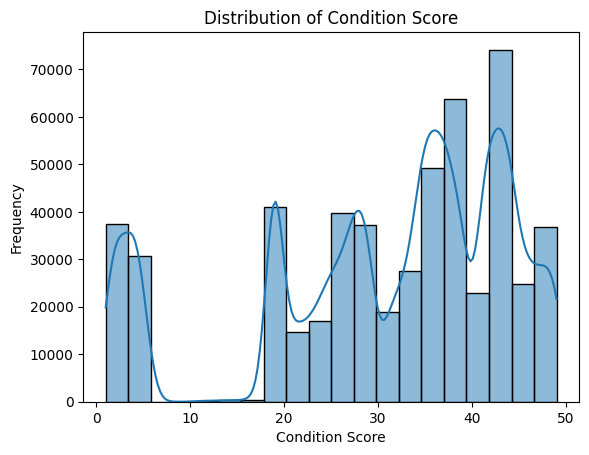

In [31]:
sns.histplot(df['condition'], bins=20, kde=True)
plt.title('Distribution of Condition Score')
plt.xlabel('Condition Score')
plt.ylabel('Frequency')
plt.show()

In [32]:
df['condition']=df['condition'].fillna(method='bfill')

C:\Users\dell\AppData\Local\Temp\ipykernel_14860\4134560860.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['condition']=df['condition'].fillna(method='bfill')


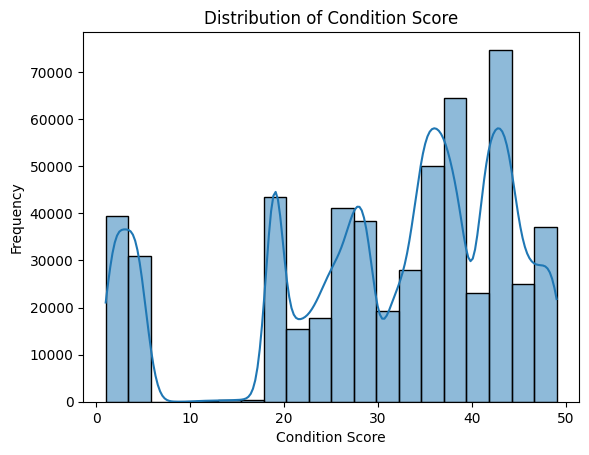

In [33]:
sns.histplot(df['condition'], bins=20, kde=True)
plt.title('Distribution of Condition Score')
plt.xlabel('Condition Score')
plt.ylabel('Frequency')
plt.show()

In [34]:
df['condition'].isnull().sum()

np.int64(0)

In [35]:
df['condition'].fillna(df['condition'].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14860\940033274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna(df['condition'].mean(), inplace=True)


In [36]:
df.isnull().sum()

year              0
make              0
model             0
trim            350
body              0
transmission      0
vin               4
state             0
condition         0
odometer         90
color           734
interior        734
seller            0
mmr              38
sellingprice     12
saledate         12
dtype: int64

# ***`odometer column`***

In [37]:
df['odometer'].describe()

count    548446.000000
mean      67523.986568
std       52910.538066
min           1.000000
25%       28131.000000
50%       51396.000000
75%       97912.000000
max      999999.000000
Name: odometer, dtype: float64

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


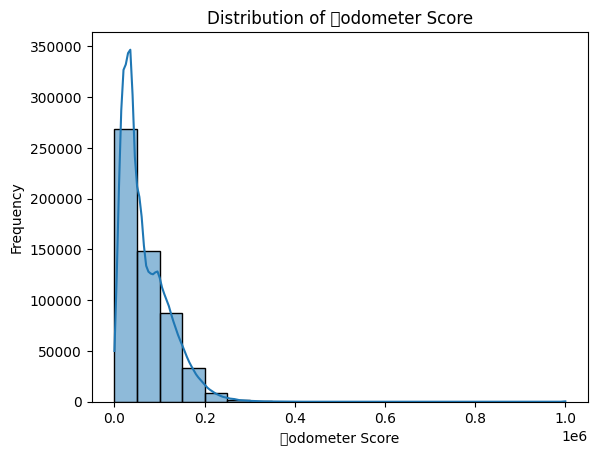

In [38]:
sns.histplot(df['odometer'], bins=20, kde=True)
plt.title('Distribution of 	odometer Score')
plt.xlabel('	odometer Score')
plt.ylabel('Frequency')
plt.show()

In [39]:
df['odometer']=df['odometer'].fillna(method='bfill')

C:\Users\dell\AppData\Local\Temp\ipykernel_14860\1826232651.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['odometer']=df['odometer'].fillna(method='bfill')


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


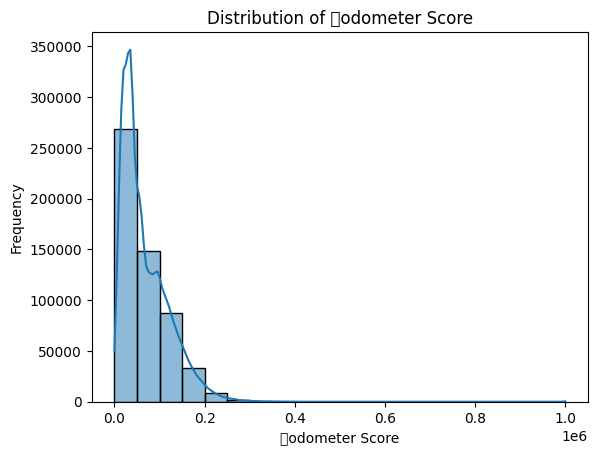

In [40]:
sns.histplot(df['odometer'], bins=20, kde=True)
plt.title('Distribution of 	odometer Score')
plt.xlabel('	odometer Score')
plt.ylabel('Frequency')
plt.show()

In [41]:
df.isnull().sum()

year              0
make              0
model             0
trim            350
body              0
transmission      0
vin               4
state             0
condition         0
odometer          0
color           734
interior        734
seller            0
mmr              38
sellingprice     12
saledate         12
dtype: int64

In [42]:
df[df['color'].isnull()]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
493,2013,Mercedes-Benz,m-class,ML350,suv,automatic,4jgda5jb6da160181,ca,46.0,32532.0,NaN,NaN,trade in solutions irvine,36100.0,34500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1723,2012,Mercedes-Benz,m-class,ML63 AMG,suv,automatic,4jgda7eb0ca049551,ca,42.0,1.0,NaN,NaN,high bid trading co inc,69000.0,18500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1824,2011,BMW,m3,Base,sedan,automatic,wbspm9c59be699111,ca,4.0,26406.0,NaN,NaN,financial services remarketing (lease),41100.0,42500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
2257,2011,Mercedes-Benz,c-class,C350 Sport,sedan,automatic,wddgf5gbxbr146489,ca,36.0,34961.0,NaN,NaN,mercedes-benz financial services,21400.0,21500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
2334,2011,Mercedes-Benz,cls-class,CLS550,sedan,automatic,wdddj7cbxba169305,ca,35.0,27372.0,NaN,NaN,mercedes-benz usa,34500.0,30000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548377,2015,MINI,cooper countryman,S ALL4,wagon,automatic,wmwzc5c54fwp46411,oh,47.0,3569.0,NaN,NaN,bmw mini north america,29500.0,31250.0,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)
550197,2012,Nissan,frontier,SV,crew cab,automatic,1n6ad0er2cc456064,tx,34.0,87082.0,NaN,NaN,fairway ford henderson,15050.0,15500.0,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
553040,2011,Ford,f-150,Lariat,supercrew,automatic,1ftfw1et2bfa51808,tn,19.0,67302.0,NaN,NaN,midtown motors,26200.0,27500.0,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)
553525,2014,Chevrolet,equinox,LTZ,suv,automatic,1gnaldek6ez103530,mo,48.0,24425.0,NaN,NaN,all star dodge chrysler jeep,24600.0,23900.0,Tue Jun 16 2015 04:00:00 GMT-0700 (PDT)


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


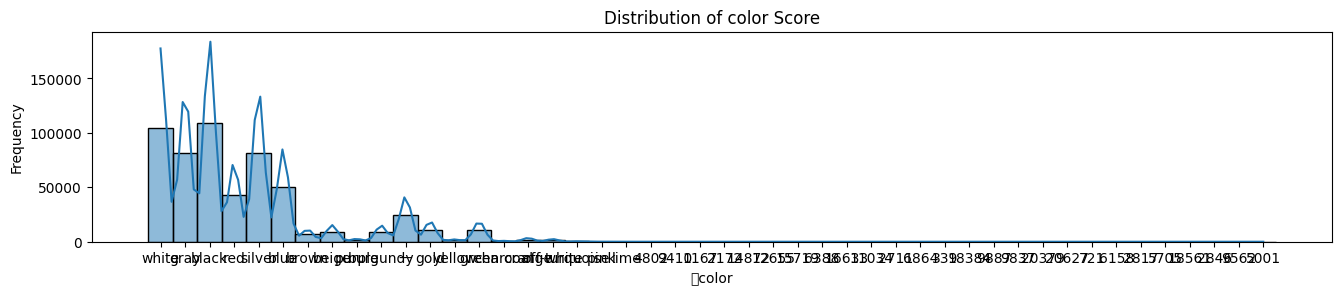

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


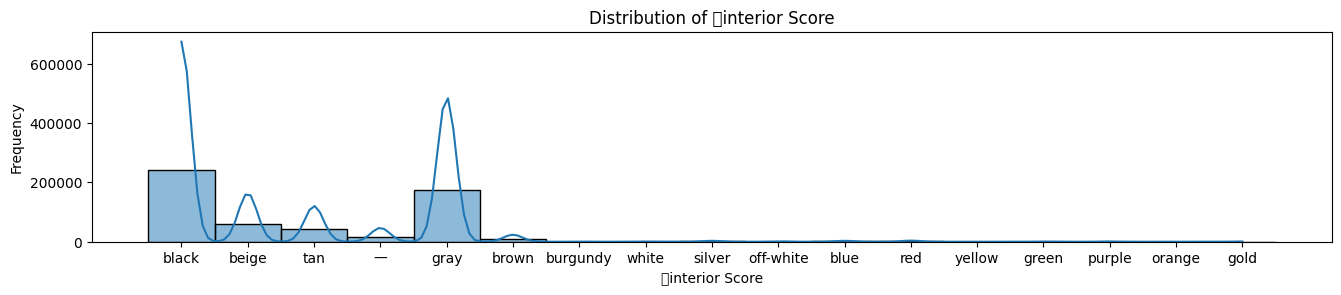

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# First subplot
plt.subplot(2, 1, 1)
sns.histplot(df['color'], bins=20, kde=True)
plt.title('Distribution of color Score')
plt.xlabel('	color')
plt.ylabel('Frequency')
plt.show()

# Second subplot
plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 2)
sns.histplot(df['interior'], bins=20, kde=True)
plt.title('Distribution of 	interior Score')
plt.xlabel('	interior Score')
plt.ylabel('Frequency')
plt.show()

plt.tight_layout()
plt.show()


In [44]:
df[['color',	'interior']]=df[['color',	'interior']].fillna(method='bfill')

C:\Users\dell\AppData\Local\Temp\ipykernel_14860\3830487938.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['color',	'interior']]=df[['color',	'interior']].fillna(method='bfill')


In [45]:
df[df['color'].isnull()]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [46]:
df.isnull().sum()

year              0
make              0
model             0
trim            350
body              0
transmission      0
vin               4
state             0
condition         0
odometer          0
color             0
interior          0
seller            0
mmr              38
sellingprice     12
saledate         12
dtype: int64

In [47]:
df['sellingprice'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Name: sellingprice, Length: 548536, dtype: bool

In [48]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
df=df.drop(33441,axis=0)

In [50]:
df.isnull().sum()

year              0
make              0
model             0
trim            350
body              0
transmission      0
vin               4
state             0
condition         0
odometer          0
color             0
interior          0
seller            0
mmr              38
sellingprice     12
saledate         12
dtype: int64

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


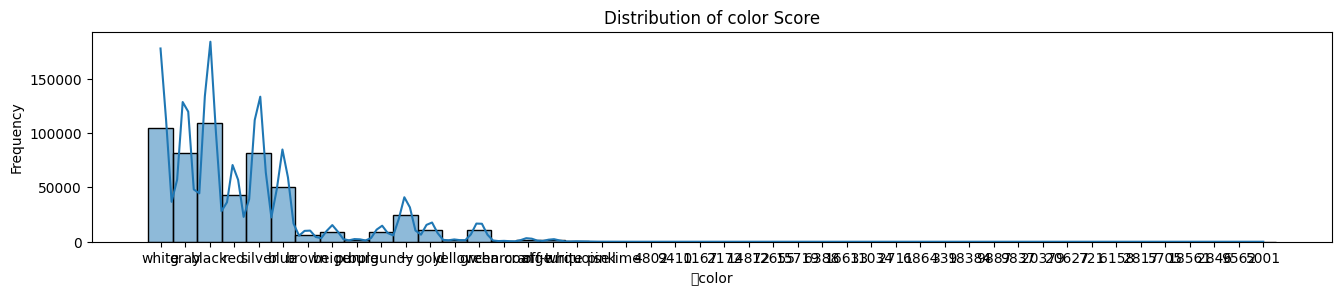

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


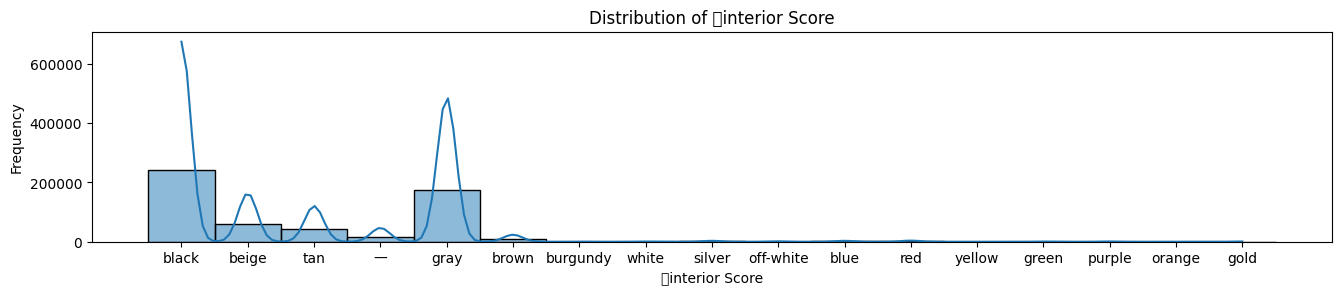

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# First subplot
plt.subplot(2, 1, 1)
sns.histplot(df['color'], bins=20, kde=True)
plt.title('Distribution of color Score')
plt.xlabel('	color')
plt.ylabel('Frequency')
plt.show()

# Second subplot
plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 2)
sns.histplot(df['interior'], bins=20, kde=True)
plt.title('Distribution of 	interior Score')
plt.xlabel('	interior Score')
plt.ylabel('Frequency')
plt.show()

plt.tight_layout()
plt.show()

# ***eda report by tdata profilin***

In [52]:
!pip install ydata-profiling


In [53]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="My Data Report", explorative=True)
profile.to_file("titanic_report.html")



KeyboardInterrupt: 

# ***trim column***





In [54]:
df['trim'].nunique()

1963

In [55]:
df['trim'] = (
    df.groupby('model')['trim']
      .transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
)


In [56]:
df['trim'].isnull().sum()

np.int64(113)

In [57]:
df['trim'] = (
    df.groupby('make')['trim']
      .transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
)

In [58]:
df['trim'].isnull().sum()

np.int64(0)

In [67]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
380056,2013,Dodge,grand caravan,SE,minivan,automatic,2c4rdgbg7dr609130,fl,36.0,89694.0,black,black,northwestern chrys/j/d/ge,9500.0,9500.0,Wed Mar 04 2015 01:00:00 GMT-0800 (PST)
56806,2014,Chevrolet,impala limited,LT Fleet,sedan,automatic,2g1wb5e32e1134663,fl,4.0,23142.0,black,gray,gm remarketing,13000.0,12800.0,Tue Jan 27 2015 01:30:00 GMT-0800 (PST)
232287,2005,Saturn,ion,2,sedan,automatic,1g8aj52f35z142372,nc,21.0,146829.0,black,gray,dt credit corporation,1400.0,1600.0,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)
30023,1996,Mercury,sable,LS,sedan,automatic,1melm53s2ta635102,va,1.0,71806.0,black,—,c l hyman auto wholesale of virginia inc,525.0,900.0,Thu Dec 18 2014 09:35:00 GMT-0800 (PST)
489553,2011,Ram,1500,SLT,crew cab,automatic,1d7rv1cp4bs687729,fl,28.0,112742.0,white,gray,wheels exchange llc,14450.0,15400.0,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [76]:
df['mmr']=df['mmr'].fillna(df['mmr'].mean())
df['sellingprice']=df['sellingprice'].fillna(df['sellingprice'].mean())
df['saledate']=df['saledate'].fillna(method='bfill')
df=df.drop(columns='vin')


C:\Users\dell\AppData\Local\Temp\ipykernel_14860\494460581.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['saledate']=df['saledate'].fillna(method='bfill')


In [77]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [78]:
df[df.isnull().any(axis=1)]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [79]:
df.to_csv('imputed_data.csv',index=False)

In [ ]:
df.isnull().sum()

In [ ]:
df.sample(7)